In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import hypergeom

In [50]:
from scipy.stats import expon

![](http://www.stat.yale.edu/Courses/1997-98/101/binpdf.gif)

# Discrete Distributions

### Binomial Distribution

<h6>Question:</h6>

A survey found that 65% of all financial consumers were very satisfied with their primary financial institution. Suppose that 25 financial consumers are
sampled and if the survey result still hold the true today what is the probability that exactly 19 are very satisfied with their primary finance institutions.

In [4]:
# Use the pmf() function to calculate cumulative probability for X=19
print(binom.pmf(k = 19, n = 25, p = 0.65))

0.09077799859322791


<h6>Question:</h6>

According to the U.S. Census Bureau, approximately 6 percentage of all workers in Jackson, Mississippi are unemployed. In conducting a random telephone survey in Jackson, what is the probability of getting 2 or fewer unemployed workers in a sample of 20?

In [5]:
# Use the cdf() function to calculate cumulative probability for X<=2

print(binom.cdf(k = 2, n = 20, p = 0.06))

0.8850275957378545


### Poisson Distribution

In [8]:
# Poisson probability for X = 3, mean = 2

poisson.pmf(k = 3,mu = 2)

0.18044704431548356

<h6>Question:</h6>

Suppose bank customers arrive randomly on any weekday afternoon at an average of 3.2 customers every 4 minutes. What is the probability of exactly 5 customers arriving in a 4-minute interval on a weekday afternoon?

In [10]:
# Use the pmf() function to calculate probability for X=5, mean = 3.2 customers/4 min

poisson.pmf(k = 5, mu = 3.2)

0.11397938346351824

<h6>Question:</h6>

Bank customers arrive randomly on weekday afternoon at an average of 3.2 customers every 4 minutes. What is the probability of having more than 7 customers
in a 4-minute interval on a week day afternoon?


In [12]:
# Use the cdf() function to calculate cumulative probability for X<=7
# Answer is 1-P(X<=7)

prob = poisson.cdf(k = 7, mu = 3.2)
ans = 1 - prob
print(ans)

0.01682984174895752


<h6>Question:</h6>

A bank has an average random arrival rate of 3.2 customers every 4 minutes. What is the probability of getting exactly 10 customers during 8 minutes interval?

In [13]:
# Use the pmf() function to calculate probability for X=10, mean = 6.4 customers/8 min
poisson.pmf(k = 10, mu = 6.4)

0.052790043854115495

### Hypergeometric Distribution

<h6>Question:</h6>

Suppose 18 major computer companies operate in the United States and that 12 are located in California's Silicon Valley. If 3 computer companies are selected randomly from their entire list, what is the probability that one or more of the selected companies are located in the Silicon Valley?

In [40]:
# N = 18, A = 12, n = 3, x = 1
# sf() = 1 - cdf()
# The function below calculates 1- P(0) which is equivalent to (P(1)+P(2)+P(3)), note cdf(0) = P(0)
ans = hypergeom.sf(0,18,3,12)
round(ans,3)

0.975

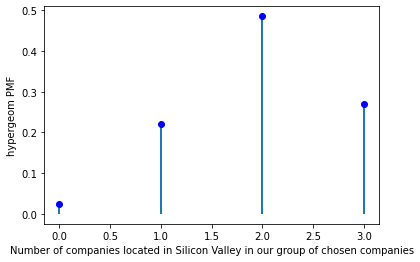

In [48]:
# Plot of probabilities - P(0), P(1), P(2), P(3)
[M, n, N] = [18, 12, 3]
rv = hypergeom(M, n, N)
x = np.arange(0, N+1)
pmf_companies = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_companies, 'bo')
ax.vlines(x, 0, pmf_companies, lw=2)
ax.set_xlabel('Number of companies located in Silicon Valley in our group of chosen companies')
ax.set_ylabel('hypergeom PMF')

plt.show()

In [41]:
# Alternate method - P(1 <= X <=3) = P(X<=3) - P(0)
ans = hypergeom.cdf(3,18,3,12) - hypergeom.pmf(0,18,3,12)
round(ans,3)

0.975

<h6>Question:</h6>

A western city has 18 police officers eligible for promotion. 11 of 18 are Hispanic. Suppose only 5 of the police officers are chosen for promotion. If the officer chosen for promotion had been selected by chance alone, what is the probability that one or fewer of the 5 promoted officers would have been Hispanic?

In [49]:
# N = 18, A = 11, n = 5, x = 1
# To find P(X <= 1)
hypergeom.cdf(1,18,5,11)

0.04738562091503275

# Continuous Distributions

### Uniform Distribution

<h6>Question:</h6>

Suppose the amount of time it takes to assembly a plastic module ranges from 27 to 39 seconds and the assembly times are uniformly distributed. Describe the distribution. What is the probability that a given assembly will take between 30 and 35 seconds?

In [19]:
# Using the parameters loc and scale, one obtains the uniform distribution on [loc, loc + scale]
# The cdf() function below returns an array of CUMULATIVE probabilities for every point specified in the range 30 to 35
probabilities = uniform.cdf(np.arange(30,36), loc = 27, scale = 12)
for x in range(30,36):
    print(f'P({x}) = {round(probabilities[x-30],3)}')

P(30) = 0.25
P(31) = 0.333
P(32) = 0.417
P(33) = 0.5
P(34) = 0.583
P(35) = 0.667


In [21]:
ans = probabilities[5] - probabilities[0]
round(ans,3)

0.417

<h6>Question:</h6>

According to the National Association of Insurance Commissioners, the average annual cost of automobile insurance in the United States in a recent year was \\$691. Suppose the automobile insurance costs are uniformly distributed in the United States with a range from \\$200 to \\$1182. What is the standard deviation of this uniform distribution?

In [22]:
# mean = 691, a = 200, b = 1182
# Checking mean below

uniform.mean(loc = 200,scale = 982)

691.0

In [23]:
# Standard deviation
uniform.std(loc = 200, scale = 982)

283.4789821721062

### Normal Distribution

In [26]:
# Find probability for X <= 68, given a normal distribution with mean = 65.5 and std = 2.5
x,mean,std = 68,65.5,2.5
norm.cdf(x,mean,std)

0.8413447460685429

In [29]:
# Find probability for X > 68, given a normal distribution with mean = 65.5 and std = 2.5
x,mean,std = 68,65.5,2.5
ans = 1-norm.cdf(x,mean,std)
round(ans,3)

0.159

In [31]:
# Find probability that X lies between 63 and 68, given a normal distribution with mean = 65.5 and std = 2.5
mean,std = 65.5,2.5
ans = norm.cdf(68,mean,std) - norm.cdf(63,mean,std)
round(ans,3)

0.683

<h6>Question:</h6>

What is the probability of obtaining a score greater than 700 on a GMAT test that has a mean equal to 494 and standard deviation of 100? Assume GMAT scores are normally distributed.

In [32]:
# To find P(X>700), mean = 494, std = 100
ans = 1 - norm.cdf(700,loc = 494, scale = 100)
round(ans,3)

0.02

<h6>Question:</h6>

For the same GMAT test, what is the probability of randomly drawing a score that is 550 or less?


In [33]:
# To find P(X<=550), mean = 494, std = 100
ans = norm.cdf(550,loc = 494, scale = 100)
round(ans,3)

0.712

<h6>Question:</h6>

For the same GMAT test, what is the probability of randomly obtaining a score between 300 to 600?

In [34]:
# To find P(300 < X < 600), mean = 494, std = 100
ans = norm.cdf(600,loc = 494, scale = 100) - norm.cdf(300,loc = 494, scale = 100)
round(ans,3)

0.829

In [37]:
# Find Z value, given area = 0.95 for a standard normal distribution(mean = 0, std = 1)
# ppf() function is the inverse of cdf()
# The answer below specifies the point on the x axis whose area to the left is 0.95
Z = norm.ppf(0.95)
Z

1.6448536269514722

In [38]:
# Find Z value, given area = (1 - 0.6772) for a standard normal distribution(mean = 0, std = 1)
Z = norm.ppf(1-0.6772)
Z

-0.45988328292440145

### Exponential Distribution

<h6>Question:</h6>

A manufacturing firm has involved in statistical quality control for several years. As part of the production process parts are randomly selected and tested. From the records of these tests, it has been established that the defective part occur in a pattern that is Poisson distributed on the average of 1.38 defects every 20 minutes during production run. Use the information to determine the probability that less than 15 minutes will elapse between any 2 defects.


In [52]:
# Note: expon.pdf(x, loc, scale) is identically equivalent to (expon.pdf(y)/scale), with y = (x - loc) / scale.
# To find P(X <= 15), mean HAS TO BE specified in the units - minutes/defect
# loc parameter specifies starting point of the distribution
mu = 20/1.38
expon.cdf(x = 15,loc = 0,scale = mu)

0.6447736190750485

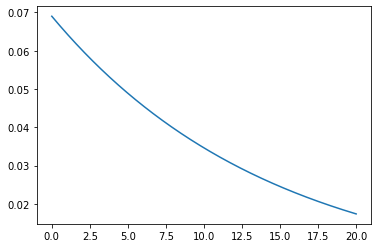

In [56]:
x = np.linspace(0,20,1000)
plt.plot(x,expon.pdf(x,loc = 0,scale = mu))